import packages

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

read in Data

In [2]:
# read the data
df = pd.read_csv("https://raw.githubusercontent.com/WillTirone/code_lou_work/main/data2/knowledge_checks/data/Parking%20Citations%202018%20Thru%203-24-18.csv")

In [3]:
# shape and data types of the data
print(df.shape)
print(df.dtypes)

(20336, 8)
Cite Number     object
Issue Date      object
Violat          object
Sublocatio      object
Street          object
Meter #         object
Is Wa           object
Due            float64
dtype: object


In [4]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Due']


In [5]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Cite Number' 'Issue Date' 'Violat' 'Sublocatio' 'Street' 'Meter #'
 'Is Wa']


Missing Data Heatmap

<AxesSubplot: >

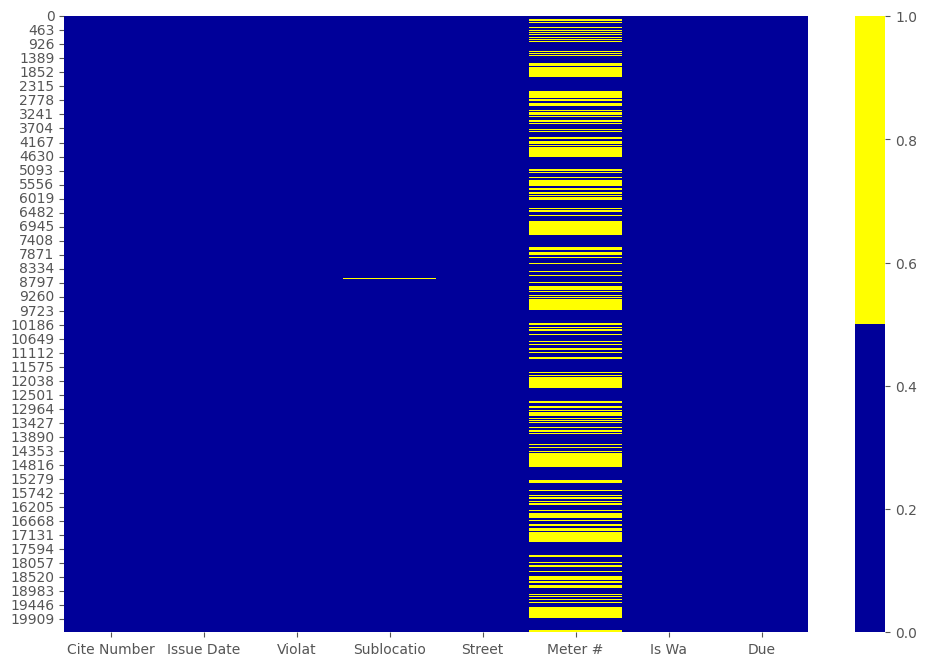

In [6]:
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
# if it's a larger dataset and the visualization takes too long we can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Cite Number - 0%
Issue Date - 0%
Violat - 0%
Sublocatio - 0%
Street - 0%
Meter # - 41%
Is Wa - 0%
Due - 0%


Lets see the Data

In [8]:
df

,Cite Number,Issue Date,Violat,Sublocatio,Street,Meter #,Is Wa,Due
0,M201507360,02/16/2018,PSW,700,YORK ST,NaN,NO,0.0
1,M201306003,01/05/2018,HO,100S,1ST ST,NaN,NO,0.0
2,M202705546,01/18/2018,X,N200,1ST ST,3012,NO,0.0
3,M202802800,01/10/2018,NPP,500W,LIBERTY ST,NaN,NO,0.0
4,M200208507,02/23/2018,NP,200E,CHESTNUT ST,NaN,NO,0.0
...,...,...,...,...,...,...,...,...
20331,M201900192,03/09/2018,OFF2,48,GARAGE - LOUISVILLE GARDENS,NaN,NO,135.0
20332,M200208453,01/16/2018,OFF3,W600,LOT - CITY HALL,NaN,NO,0.0
20333,M201610981,03/20/2018,OFF3,800S,LOT - MUD,NaN,NO,15.0
20334,M200706429,02/16/2018,NPP,300W,MARKET ST,NaN,NO,0.0


fixing misspelled words and lets make everything lowercase, I want to drop the # sysmbol in (Meter #) because the # symbol will cause problems when writing code with it, lets change it to meter_number,

In [9]:
fixed_columns = {
    'Cite Number':'citation_number',
    'Issue Date':'issue_date',
    'Violat':'violation',
    'Sublocatio':'sublocation',
    'Street':'street',
    'Meter #':'meter_number',
    'Is Wa':'is_warning',
    'Due':'due'
}

df.rename(columns=fixed_columns,inplace=True)
df.columns

Index(['citation_number', 'issue_date', 'violation', 'sublocation', 'street',
       'meter_number', 'is_warning', 'due'],
      dtype='object')

lets fill the meter_number column with _MISSING_  or a numeric value

In [10]:
# categorical
df['meter_number'] = df['meter_number'].fillna('_MISSING_')


# numeric
df['meter_number'] = df['meter_number'].fillna(-999)
df

,citation_number,issue_date,violation,sublocation,street,meter_number,is_warning,due
0,M201507360,02/16/2018,PSW,700,YORK ST,_MISSING_,NO,0.0
1,M201306003,01/05/2018,HO,100S,1ST ST,_MISSING_,NO,0.0
2,M202705546,01/18/2018,X,N200,1ST ST,3012,NO,0.0
3,M202802800,01/10/2018,NPP,500W,LIBERTY ST,_MISSING_,NO,0.0
4,M200208507,02/23/2018,NP,200E,CHESTNUT ST,_MISSING_,NO,0.0
...,...,...,...,...,...,...,...,...
20331,M201900192,03/09/2018,OFF2,48,GARAGE - LOUISVILLE GARDENS,_MISSING_,NO,135.0
20332,M200208453,01/16/2018,OFF3,W600,LOT - CITY HALL,_MISSING_,NO,0.0
20333,M201610981,03/20/2018,OFF3,800S,LOT - MUD,_MISSING_,NO,15.0
20334,M200706429,02/16/2018,NPP,300W,MARKET ST,_MISSING_,NO,0.0


lets just Delete the whole meter_number column because of the missing values

In [12]:
# Meter number has a lot of missing values
# If we want to drop the column.

del df['meter_number']
df

,citation_number,issue_date,violation,sublocation,street,is_warning,due
0,M201507360,02/16/2018,PSW,700,YORK ST,NO,0.0
1,M201306003,01/05/2018,HO,100S,1ST ST,NO,0.0
2,M202705546,01/18/2018,X,N200,1ST ST,NO,0.0
3,M202802800,01/10/2018,NPP,500W,LIBERTY ST,NO,0.0
4,M200208507,02/23/2018,NP,200E,CHESTNUT ST,NO,0.0
...,...,...,...,...,...,...,...
20331,M201900192,03/09/2018,OFF2,48,GARAGE - LOUISVILLE GARDENS,NO,135.0
20332,M200208453,01/16/2018,OFF3,W600,LOT - CITY HALL,NO,0.0
20333,M201610981,03/20/2018,OFF3,800S,LOT - MUD,NO,15.0
20334,M200706429,02/16/2018,NPP,300W,MARKET ST,NO,0.0
